### Customer Segmentation of DataCo Global Supply Chain Dataset

Customer segmentation is the process of dividing a customer base into groups with similar characteristics, behaviors, or preferences. In Python, you can use various libraries for data manipulation and clustering, such as pandas and scikit-learn. Below, We will guide you through a customer segmentation of Dataco Global using their Supply Chain Dataset:
https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis?select=DataCoSupplyChainDataset.csv

#### Step 1: Importing libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

#### Step 2: Load and Explore the Data

In [2]:
# Load the dataset
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')

In [3]:
# Display the first five rows of the dataset
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

#### Step 3: Data Cleaning and Preprocessing

In [5]:
# check for missing values
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [6]:
# drop rows with missing values
df = df.dropna(how='all')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


#### Step 4: Feature Engineering

In [7]:
# Select relevant columns for segmentation
selected_cols = ['Order Item Quantity', 'Sales', 'Benefit per order', 'Sales per customer', 'Order Item Discount', 'Order Item Total',
                'order date (DateOrders)', 'shipping date (DateOrders)']
df_segmentation = df[selected_cols]

In [8]:
df_segmentation.head()

,Order Item Quantity,Sales,Benefit per order,Sales per customer,Order Item Discount,Order Item Total,order date (DateOrders),shipping date (DateOrders)
0,1,327.75,91.250000,314.640015,13.110000,314.640015,1/31/2018 22:56,2/3/2018 22:56
1,1,327.75,-249.089996,311.359985,16.389999,311.359985,1/13/2018 12:27,1/18/2018 12:27
2,1,327.75,-247.779999,309.720001,18.030001,309.720001,1/13/2018 12:06,1/17/2018 12:06
3,1,327.75,22.860001,304.809998,22.940001,304.809998,1/13/2018 11:45,1/16/2018 11:45
4,1,327.75,134.210007,298.250000,29.500000,298.250000,1/13/2018 11:24,1/15/2018 11:24


<Axes: >

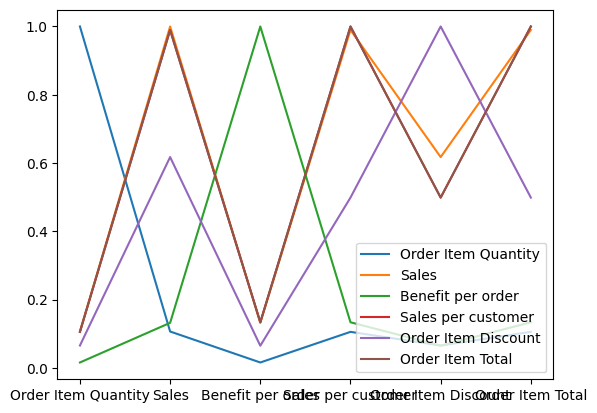

In [11]:
df_segmentation.iloc[:,:-2].corr().plot()

In [12]:
# Convert 'OrderDate' and 'ShipDate' to datetime objects
df_segmentation['order date (DateOrders)'] = pd.to_datetime(df_segmentation['order date (DateOrders)'])
df_segmentation['shipping date (DateOrders)'] = pd.to_datetime(df_segmentation['shipping date (DateOrders)'])

In [14]:
# Calculate the duration between order and shipment
df_segmentation['OrderDuration'] = (df_segmentation['shipping date (DateOrders)'] - df_segmentation['order date (DateOrders)']).dt.days

# Display the modified DataFrame
df_segmentation.head()

,Order Item Quantity,Sales,Benefit per order,Sales per customer,Order Item Discount,Order Item Total,order date (DateOrders),shipping date (DateOrders),OrderDuration
0,1,327.75,91.250000,314.640015,13.110000,314.640015,2018-01-31 22:56:00,2018-02-03 22:56:00,3
1,1,327.75,-249.089996,311.359985,16.389999,311.359985,2018-01-13 12:27:00,2018-01-18 12:27:00,5
2,1,327.75,-247.779999,309.720001,18.030001,309.720001,2018-01-13 12:06:00,2018-01-17 12:06:00,4
3,1,327.75,22.860001,304.809998,22.940001,304.809998,2018-01-13 11:45:00,2018-01-16 11:45:00,3
4,1,327.75,134.210007,298.250000,29.500000,298.250000,2018-01-13 11:24:00,2018-01-15 11:24:00,2


#### Scaling

In [15]:
# select numerical columns for scaling
numerical_cols = ['Order Item Quantity', 'Sales', 'Benefit per order', 'Order Item Total', 'Sales per customer', 'OrderDuration', 'Order Item Discount']

In [16]:
# Standardize the numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_segmentation[numerical_cols])

In [17]:
# Create a dataframe with the scaled features
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)

# Display the scaled dataframe
df_scaled.head()

,Order Item Quantity,Sales,Benefit per order,Order Item Total,Sales per customer,OrderDuration,Order Item Discount
0,-0.775836,0.93729,0.663343,1.095708,1.095708,-0.282470,-0.346534
1,-0.775836,0.93729,-2.595582,1.068384,1.068384,0.914801,-0.196082
2,-0.775836,0.93729,-2.583038,1.054722,1.054722,0.316165,-0.120855
3,-0.775836,0.93729,0.008474,1.013820,1.013820,-0.282470,0.104366
4,-0.775836,0.93729,1.074706,0.959174,0.959174,-0.881105,0.405271


#### Cluster Selection

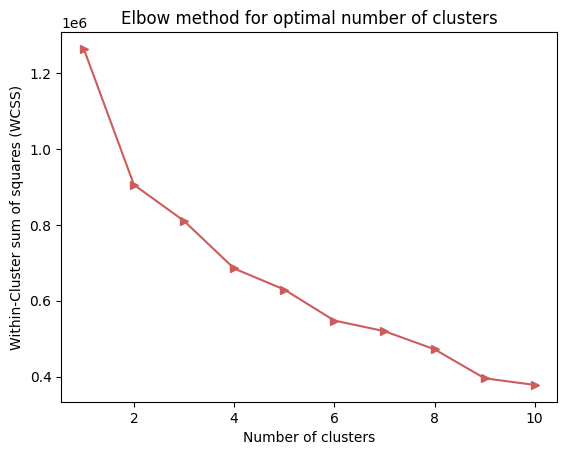

In [20]:
# elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), wcss, marker='>', color='indianred')
plt.title('Elbow method for optimal number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster sum of squares (WCSS)')
plt.show()

#### Step 5: Customer Segmentation using K-Means Clustering

In [21]:
# choose the optimal number of clusters (elbow point)
optimal_clusters = 4

# customer segmentation using K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_segmentation['SegmentID'] = kmeans.fit_predict(df_scaled)

# Display the dataframe with the cluster assignments
df_segmentation.head()

,Order Item Quantity,Sales,Benefit per order,Sales per customer,Order Item Discount,Order Item Total,order date (DateOrders),shipping date (DateOrders),OrderDuration,SegmentID
0,1,327.75,91.250000,314.640015,13.110000,314.640015,2018-01-31 22:56:00,2018-02-03 22:56:00,3,2
1,1,327.75,-249.089996,311.359985,16.389999,311.359985,2018-01-13 12:27:00,2018-01-18 12:27:00,5,2
2,1,327.75,-247.779999,309.720001,18.030001,309.720001,2018-01-13 12:06:00,2018-01-17 12:06:00,4,2
3,1,327.75,22.860001,304.809998,22.940001,304.809998,2018-01-13 11:45:00,2018-01-16 11:45:00,3,2
4,1,327.75,134.210007,298.250000,29.500000,298.250000,2018-01-13 11:24:00,2018-01-15 11:24:00,2,2


#### Customer category mapping

In [28]:
# Create 'SegmentCat' column based on 'Cluster' values
df_segmentation['SegmentCat'] = df_segmentation['SegmentID'].map({
    0: 'Elite Customers',
    1: 'Core Customers',
    2: 'Loyal Customers',
    3: 'Impulse Customers'
})

df_segmentation.head()

,Order Item Quantity,Sales,Benefit per order,Sales per customer,Order Item Discount,Order Item Total,order date (DateOrders),shipping date (DateOrders),OrderDuration,SegmentID,SegmentCat
0,1,327.75,91.250000,314.640015,13.110000,314.640015,2018-01-31 22:56:00,2018-02-03 22:56:00,3,2,Loyal Customers
1,1,327.75,-249.089996,311.359985,16.389999,311.359985,2018-01-13 12:27:00,2018-01-18 12:27:00,5,2,Loyal Customers
2,1,327.75,-247.779999,309.720001,18.030001,309.720001,2018-01-13 12:06:00,2018-01-17 12:06:00,4,2,Loyal Customers
3,1,327.75,22.860001,304.809998,22.940001,304.809998,2018-01-13 11:45:00,2018-01-16 11:45:00,3,2,Loyal Customers
4,1,327.75,134.210007,298.250000,29.500000,298.250000,2018-01-13 11:24:00,2018-01-15 11:24:00,2,2,Loyal Customers


#### Step 6: Analyze the segmentation

Number of customers for each category

In [33]:
elite_c = (len(df_segmentation[df_segmentation['SegmentCat']=='Elite Customers'])/len(df_segmentation))*100
core_c = (len(df_segmentation[df_segmentation['SegmentCat']=='Core Customers'])/len(df_segmentation))*100
loyal_c = (len(df_segmentation[df_segmentation['SegmentCat']=='Loyal Customers'])/len(df_segmentation))*100
impulse_c = (len(df_segmentation[df_segmentation['SegmentCat']=='Impulse Customers'])/len(df_segmentation))*100

print(f'Elite Customers: {elite_c:.1f}%')
print(f'Core Customers: {core_c:.1f}%')
print(f'Loyal Customers: {loyal_c:.1f}%')
print(f'Impulse Customers: {impulse_c:.1f}%')

Elite Customers: 26.8%
Core Customers: 29.9%
Loyal Customers: 22.6%
Impulse Customers: 20.7%


#### data visualization

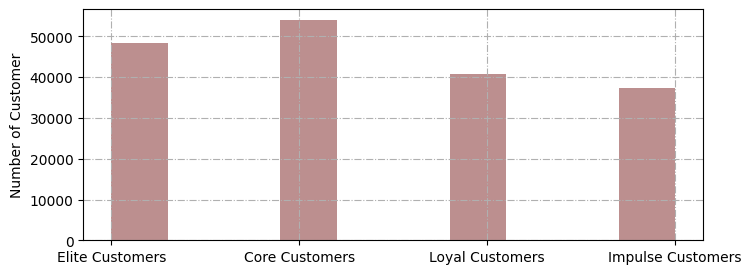

In [34]:
cat = df_segmentation[['SegmentCat', 'SegmentID']]
cat_sorted = cat.sort_values(by=['SegmentID'])
plt.figure(figsize=(8,3))
plt.hist(cat_sorted['SegmentCat'], color='rosybrown')
plt.ylabel('Number of Customer')
plt.grid(True, linestyle='-.')
plt.show()

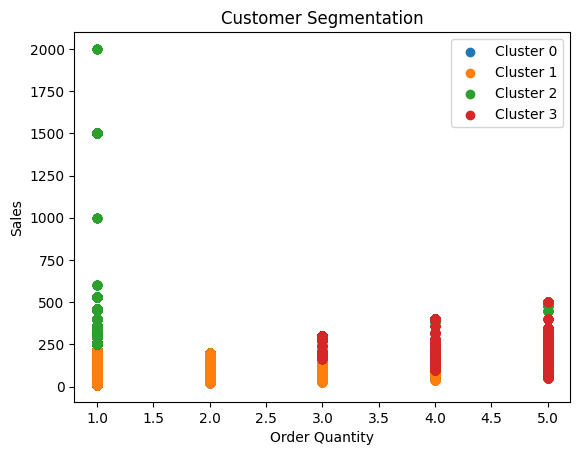

In [35]:
# Visualize the clusters
for cluster in range(optimal_clusters):
    cluster_data = df_segmentation[df_segmentation['SegmentID']==cluster]
    plt.scatter(cluster_data['Order Item Quantity'], cluster_data['Sales'], label=f'Cluster {cluster}')

plt.xlabel('Order Quantity')
plt.ylabel('Sales')
plt.title('Customer Segmentation')
plt.legend()
plt.show()

* Box Plots: These plots show the distribution of each numerical feature within different clusters. They help visualize the spread of data and identify potential outliers.

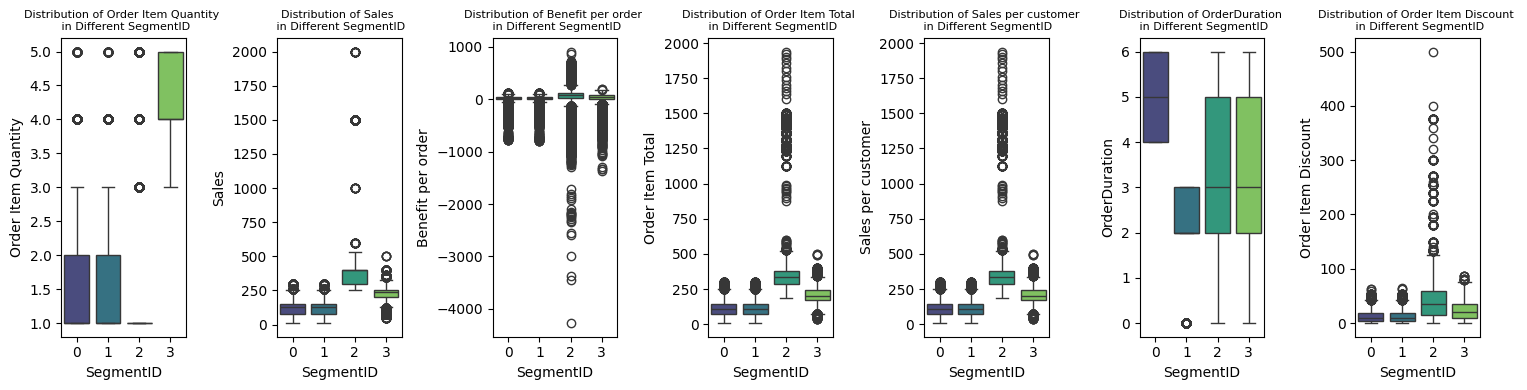

In [38]:
# visualize the distribution of each feature in different clusters
plt.figure(figsize=(15,4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 7, i)
    sns.boxplot(x='SegmentID', y=col, data=df_segmentation, palette='viridis')
    plt.title(f'Distribution of {col} \n in Different SegmentID', fontsize=8)

plt.tight_layout()
plt.show()

* Cluster Chacracteristics: Bar plots showing the mean values of features in each cluster. This provides insight into the characteristics that differentiate one cluster from another.

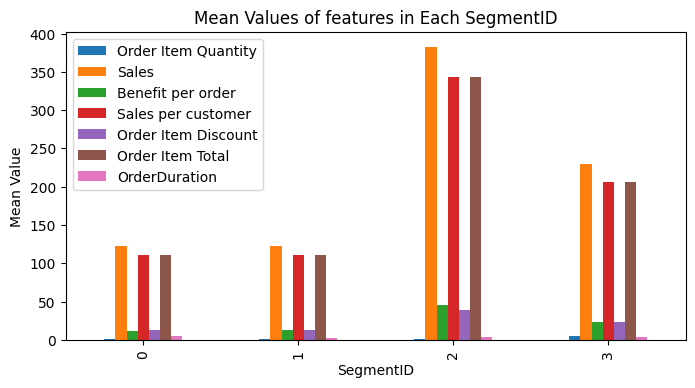

In [49]:
# Explore the characteristics of each cluster
cluster_means = df_segmentation.groupby('SegmentID').mean(numeric_only=True)
cluster_means.plot(kind='bar', figsize=(8,4))
plt.title('Mean Values of features in Each SegmentID')
plt.ylabel('Mean Value')
plt.show()

#### Step 7: Predictive Modelling

In [50]:
# Save the trained model and scaler for future use
import joblib

joblib.dump(kmeans, 'kmeans_model.joblib')
joblib.dump(scaler, 'scaler_model.joblib')

['scaler_model.joblib']

In [51]:
# Predict the category for new data
def predict_category(new_data):
    # load the trained model and scaler
    kmeans_model = joblib.load('kmeans_model.joblib')
    scaler_model = joblib.load('scaler_model.joblib')

    # preprocess the new data
    new_data_scaled = scaler_model.transform(new_data)

    # predict the cluster
    cluster_prediction = kmeans_model.predict(new_data_scaled)

    # Map the cluster to the category
    category_prediction = {
        0: 'Elite Customers',
        1: 'Core Customers',
        2: 'Loyal Customers',
        3: 'Impulse Customers'
    }.get(cluster_prediction[0], 'Unknown Category')
    
    return category_prediction

In [52]:
# Predictions
new_data_example = [[1, 327, 91.25, 314.64, 3, 314.64, 13.11]] # new data for the predictors
predicted_category = predict_category(new_data_example)
print(f"Predicted Category: {predicted_category}")

Predicted Category: Elite Customers
